## Importing libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
dataset = fetch_california_housing()

In [8]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [20]:
X= pd.DataFrame(dataset.data)
X.columns = dataset.feature_names
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
y = pd.DataFrame(dataset.target)
y.columns = dataset.target_names
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Train , Test and Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

## Standardizing the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Regression model

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
##cross validation
from sklearn.model_selection import cross_val_score

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [54]:
np.mean(mse)

-0.5257104326777

## Prediction

In [55]:
y_pred = model.predict(X_test)

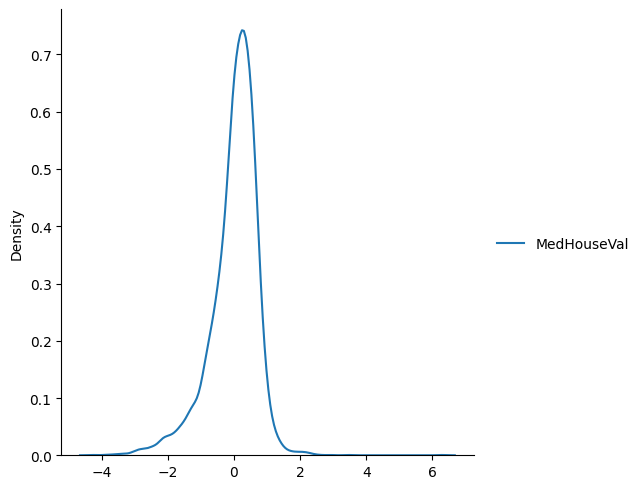

In [56]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [57]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.37731023013299636